# Swindon Wellbeing

This script was written to provide easy interpretation of wellbeing statistics for Swindon. It has been initialised to load the data available [here](https://www.ons.gov.uk/datasets/wellbeing-local-authority/editions/time-series/versions/1) The link allows an excel file to be downloaded.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import linregress
from matplotlib.lines import Line2D

## Loading Data Required

First we load the data from the file indicated by the *MASTER_FILE* variable, the range of *MEASURES* is also defined to give the wellbeing measured to be extracted.

In [57]:
MASTER_FILE = "wellbeing_data.csv"
MEASURES = ["Anxiety", "Happiness", "Life Satisfaction", "Worthwhile"]
RATINGS = ["Poor", "Fair", "Good", "Very good"]

In [43]:
# Load data
wellbeing_data = pd.read_csv(MASTER_FILE, delimiter=',', skiprows=2)

def extract_average_data(data):
    """ Extracts the data from the PANDAS table into the measures of wellbeing. """
    measures = {}
    for m in MEASURES:
        # Get only this current measure
        m_data = data.loc[data['MeasureOfWellbeing'] == m]
        measures[m] = {}
        for score in m_data['Estimate'].unique():
            s_data = m_data.loc[m_data['Estimate'] == score]
            s_data = s_data.iloc[:, 4:].to_numpy()[0]
            measures[m][score] = np.zeros(int(s_data.shape[0]/4))
            for year in range(0, int(s_data.shape[0]/4)):
                measures[m][score][year] = s_data[year*4]
    return measures
wellbeing_data = extract_average_data(wellbeing_data)

## Yearly Proportion of results

Stacked bar charts to show the proportion of resuts per year.

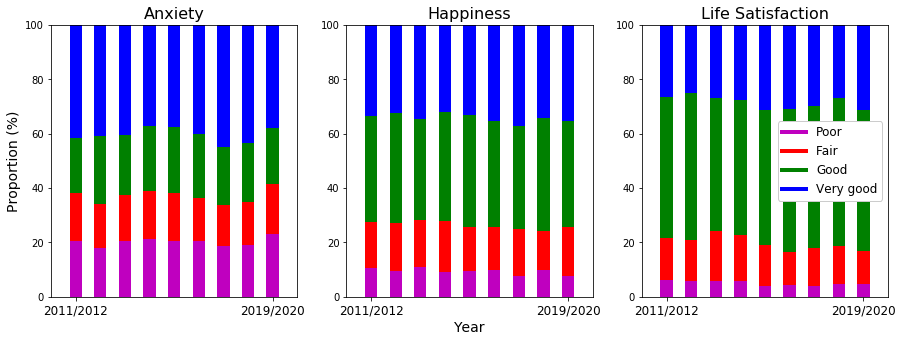

In [86]:
fig, all_axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

colours = ['m', 'r', 'g', 'b', 'c', 'y', 'k']
bar_width = 0.5

ticks = [1, 9]
labels = ["2011/2012", "2019/2020"]

for idx, m in enumerate(MEASURES[:-1]):
    axs = all_axs[idx]
    for year in range(0, wellbeing_data[m][RATINGS[0]].shape[0]):
        height = 0
        for sidx, score in enumerate(RATINGS):
            axs.bar(year+1, wellbeing_data[m][score][year],
                        bar_width, bottom=height, color=colours[sidx])
            height = height + wellbeing_data[m][score][year]
    axs.set_title(m, fontsize=16)
    axs.set_xlim([0, 10])
    axs.set_ylim([0, 100])
    axs.set_xticks(ticks)
    axs.set_xticklabels(labels, fontsize=12)

all_axs[1].set_xlabel("Year", fontsize=14)
all_axs[0].set_ylabel("Proportion (%)", fontsize=14)

bars = []
for idx, b in enumerate(RATINGS):
    bars.append(Line2D([0], [0], color=colours[idx], lw=4))

all_axs[-1].legend(bars, RATINGS,
                   loc="center right",
                   ncol=1, fontsize=12,
                   facecolor='w', framealpha=1)